<a href="https://colab.research.google.com/github/francescobarbara/NNets-robustness-to-probabilistic-perturbations/blob/main/robustness_to_prob_perturbations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import output

with output.temporary():
  !pip install --upgrade git+https://github.com/Kreijstal/colab_inspector.git 
  !python2.7 -m pip install --upgrade git+https://github.com/blois/colab_inspector.git 
  !jupyter nbextension install --py inspector

import inspector

# open a scratch cell (Ctrl+Alt+N)
# run there
# inspector.watch_globals()

In [ ]:
inspector.watch_globals()

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [ ]:
from copy import deepcopy

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def normalize(x):
    n = np.zeros(x.shape)
    s = x.std(axis = 0)
    
    for j in range(x.shape[1]):
        if not s[j][0] == 0:
            n[:,j,0] = (x[:,j,0] - x[:,j,0].mean())/s[j][0]
    return n

In [ ]:
def perturbed_dataset(x, n, d, sigma, c):

  noise = np.random.normal(loc=0.0, scale=sigma, size=(n,d,1))
  out = x + noise

  for i in range(1, c):
    noise = np.random.normal(loc=0.0, scale=sigma, size=(n,d,1))
    perturbed = x + noise
    out = np.concatenate((out, perturbed), axis = 0)
  return out

In [ ]:
def perturbed_dataset_uniform(x, n, d, sigma, c):

  noise = np.random.uniform(low = -sigma, high = sigma, size=(n,d,1))
  out = x + noise

  for i in range(1, c):
    noise = np.random.uniform(low = -sigma, high = sigma, size=(n,d,1))
    perturbed = x + noise
    out = np.concatenate((out, perturbed), axis = 0)
  return out

In [ ]:
(x_train, y_train), (x_test, y_test)= mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_flatten = x_train.reshape(x_train.shape[0], 784, 1)
y_train_flatten = deepcopy(y_train)
x_test_flatten = x_test.reshape(x_test.shape[0], 784, 1)
y_test_flatten = deepcopy(y_test)

In [ ]:
x_train_normalized = normalize(x_train_flatten)
x_test_normalized = normalize(x_test_flatten)

In [ ]:
x_train_normalized.shape

(60000, 784, 1)

Skip model1, model2

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model.fit(x_train_flatten, y_train,epochs=10,batch_size=32, validation_data = (x_test_flatten, y_test))

In [ ]:
#test architecture
scores = model.evaluate(x_test_flatten, y_test)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.2815 - accuracy: 0.9454

accuracy: 94.54%


In [ ]:
model2 = Sequential()
model2.add(Dense(100, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

model2.fit(x_train_normalized, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

This is the cool perturbed gaussian function

In [ ]:
x_train_perturbed_1 = perturbed_dataset(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 0.2, c = 1)

In [ ]:
x_train_perturbed_2 = perturbed_dataset(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 5, c = 1)

In [ ]:
x_test_perturbed_1 = perturbed_dataset(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = 0.2, c = 1)

In [ ]:
x_test_perturbed_2 = perturbed_dataset(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = 5, c = 1)

Here are the uniform perturbations

In [ ]:
x_train_perturbed_3 = perturbed_dataset_uniform(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 0.2, c = 1)

In [ ]:
x_train_perturbed_4 = perturbed_dataset_uniform(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 0.5, c = 1)

In [ ]:
x_test_perturbed_3 = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = 0.2, c = 1)

In [ ]:
x_test_perturbed_4 = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = 1.5, c = 1)

In [ ]:
x_test_normalized[2]

In [ ]:
x_train_perturbed_10 = perturbed_dataset_uniform(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 0.5, c = 1)

In [ ]:
model10 = Sequential()
model10.add(Dense(100, input_dim=784, activation='relu'))
model10.add(Dense(10, activation='softmax'))

model10.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model10.summary()

model10.fit(x_train_perturbed_10, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.2848 - accuracy: 0.9176 - val_loss: 0.1540 - val_accuracy: 0.9563
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1167 - accuracy: 0.9653 - val_loss: 0.1320 - val_accuracy: 0.9674
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0708 - accuracy: 0.9794 - val_loss: 0.1331 - val_accuracy: 0.9673
Epoch 4/15
938/938 [

In [ ]:
x_train_perturbed_9 = perturbed_dataset_uniform(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 2, c = 1)

In [ ]:
model9 = Sequential()
model9.add(Dense(100, input_dim=784, activation='relu'))
model9.add(Dense(10, activation='softmax'))

model9.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model9.summary()

model9.fit(x_train_perturbed_9, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.5201 - accuracy: 0.8401 - val_loss: 0.1991 - val_accuracy: 0.9434
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2255 - accuracy: 0.9292 - val_loss: 0.1612 - val_accuracy: 0.9530
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1428 - accuracy: 0.9557 - val_loss: 0.1522 - val_accuracy: 0.9585
Epoch 4/15
938/938 [

In [ ]:
x_train_perturbed_8 = perturbed_dataset_uniform(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 1, c = 1)

In [ ]:
model8 = Sequential()
model8.add(Dense(100, input_dim=784, activation='relu'))
model8.add(Dense(10, activation='softmax'))

model8.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model8.summary()

model8.fit(x_train_perturbed_8, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.3331 - accuracy: 0.9008 - val_loss: 0.1543 - val_accuracy: 0.9575
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1304 - accuracy: 0.9621 - val_loss: 0.1341 - val_accuracy: 0.9630
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0753 - accuracy: 0.9783 - val_loss: 0.1182 - val_accuracy: 0.9680
Epoch 4/15
938/938 [

In [ ]:
x_train_perturbed_7 = perturbed_dataset_uniform(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 10, c = 1)

In [ ]:
model7 = Sequential()
model7.add(Dense(100, input_dim=784, activation='relu'))
model7.add(Dense(10, activation='softmax'))

model7.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model7.summary()

model7.fit(x_train_perturbed_7, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 3.1550 - accuracy: 0.3211 - val_loss: 1.0927 - val_accuracy: 0.7780
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 1.5524 - accuracy: 0.4733 - val_loss: 1.0612 - val_accuracy: 0.8012
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 1.4559 - accuracy: 0.5047 - val_loss: 1.0125 - val_accuracy: 0.8039
Epoch 4/15
938/938 [

In [ ]:
x_train_perturbed_2 = perturbed_dataset(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 1.5, c = 1)

In [ ]:
model2 = Sequential()
model2.add(Dense(100, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

model2.fit(x_train_perturbed_2, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.6718 - accuracy: 0.7907 - val_loss: 0.2288 - val_accuracy: 0.9324
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3181 - accuracy: 0.8997 - val_loss: 0.1845 - val_accuracy: 0.9430
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2148 - accuracy: 0.9317 - val_loss: 0.1716 - val_accuracy: 0.9471
Epoch 4/15
938/938 [

In [ ]:
x_train_perturbed_3 = perturbed_dataset_uniform(x_train_normalized, x_train_normalized.shape[0], x_train_normalized.shape[1], sigma = 5, c = 1)

In [ ]:
model3 = Sequential()
model3.add(Dense(100, input_dim=784, activation='relu'))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

model3.fit(x_train_perturbed_3, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 1.4231 - accuracy: 0.5888 - val_loss: 0.4559 - val_accuracy: 0.8729
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.7998 - accuracy: 0.7351 - val_loss: 0.4012 - val_accuracy: 0.8881
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.6650 - accuracy: 0.7768 - val_loss: 0.3515 - val_accuracy: 0.8978
Epoch 4/15
938/938 [

In [ ]:
model4 = Sequential()
model4.add(Dense(100, input_dim=784, activation='relu'))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

model4.fit(x_train_perturbed_2, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.6749 - accuracy: 0.7900 - val_loss: 0.2439 - val_accuracy: 0.9257
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.3198 - accuracy: 0.8985 - val_loss: 0.1945 - val_accuracy: 0.9399
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2130 - accuracy: 0.9328 - val_loss: 0.1682 - val_accuracy: 0.9517
Epoch 4/15
938/938 [

In [ ]:
model5 = Sequential()
model5.add(Dense(100, input_dim=784, activation='relu'))
model5.add(Dense(10, activation='softmax'))

model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

model5.fit(x_train_perturbed_1, y_train,epochs=15,batch_size=64)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 3s 3ms/step - loss: 0.2715 - accuracy: 0.9214
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1114 - accuracy: 0.9668
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0716 - accuracy: 0.9788
Epoch 4/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0486 - accuracy: 0.9858
Epoch 5/15
938/938 [==========================

In [ ]:
model6 = Sequential()
model6.add(Dense(100, input_dim=784, activation='relu'))
model6.add(Dense(10, activation='softmax'))

model6.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model6.summary()

model6.fit(x_train_normalized, y_train,epochs=15,batch_size=64, validation_data = (x_test_normalized, y_test))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
938/938 [==============================] - 4s 3ms/step - loss: 0.2692 - accuracy: 0.9227 - val_loss: 0.1503 - val_accuracy: 0.9586
Epoch 2/15
938/938 [==============================] - 3s 3ms/step - loss: 0.1102 - accuracy: 0.9671 - val_loss: 0.1200 - val_accuracy: 0.9667
Epoch 3/15
938/938 [==============================] - 3s 3ms/step - loss: 0.0739 - accuracy: 0.9777 - val_loss: 0.1178 - val_accuracy: 0.9682
Epoch 4/15
938/938 [

In [ ]:
model3.history.history['accuracy']
model3.history.history['loss']
model3.history.history['val_accuracy']
model3.history.history['val_loss']

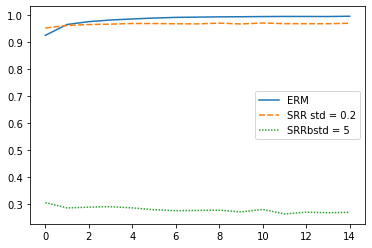

In [ ]:
sns.lineplot(data= [model3.history.history['accuracy'], model3.history.history['val_accuracy'], model4.history.history['val_accuracy']], legend = False)
plt.legend(loc='center right', labels=['ERM', 'SRR std = 0.2', 'SRRbstd = 5'])

Il grafico di epsilon, when we use clean training samples

In [ ]:
scores = model6.evaluate(x_test_flatten, y_test)
type(scores)
print(scores)
36/313

cross_entropy = []
accuracy = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model6.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy.append(scores[0])
  accuracy.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy2 = []
accuracy2 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model5.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy2.append(scores[0])
  accuracy2.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy3 = []
accuracy3 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model4.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy3.append(scores[0])
  accuracy3.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy4 = []
accuracy4 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model3.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy4.append(scores[0])
  accuracy4.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy5 = []
accuracy5 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model2.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy5.append(scores[0])
  accuracy5.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy7 = []
accuracy7 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model7.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy7.append(scores[0])
  accuracy7.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy8 = []
accuracy8 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model8.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy8.append(scores[0])
  accuracy8.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy9 = []
accuracy9 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model9.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy9.append(scores[0])
  accuracy9.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
cross_entropy10 = []
accuracy10 = []
for i in range(51):
  x_test_perturbed_uniformly = perturbed_dataset_uniform(x_test_normalized, x_test_normalized.shape[0], x_test_normalized.shape[1], sigma = i/10, c = 1)
  scores = model10.evaluate(x_test_perturbed_uniformly, y_test)
  cross_entropy10.append(scores[0])
  accuracy10.append(scores[1])
#print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

313/313 [==============================] - 1s 2ms/step - loss: 13.4763 - accuracy: 0.4171


In [ ]:
len(np.arange(0, 5.1, 0.1))

51

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


Text(0.5, 0, 'Uniform noise')

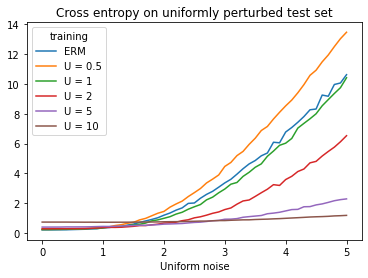

In [ ]:
sns.lineplot(y =  cross_entropy,x = np.arange(0, 5.1, 0.1),  legend = False)
#sns.lineplot(y = cross_entropy2 ,x = np.arange(0, 5.1, 0.1),  legend = False) #N = 0.2
#sns.lineplot(y = cross_entropy3 ,x = np.arange(0, 5.1, 0.1),  legend = False) #N = 5
sns.lineplot(y = cross_entropy10 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 0.5

sns.lineplot(y = cross_entropy8 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 1
sns.lineplot(y = cross_entropy9 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 2
#sns.lineplot(y = cross_entropy5 ,x = np.arange(0, 5.1, 0.1),  legend = False) #N = 1.5
sns.lineplot(y = cross_entropy4 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 5
sns.lineplot(y = cross_entropy7 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 10

plt.legend(loc='top left', labels=['ERM', 'U = 0.5', 'U = 1', 'U = 2', 'U = 5', 'U = 10' ], title = 'training')
plt.title('Cross entropy on uniformly perturbed test set')
plt.xlabel('Uniform noise')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Unrecognized location 'top left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if sys.path[0] == '':


Text(0.5, 0, 'Uniform noise')

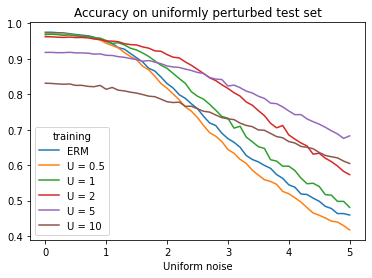

In [ ]:
sns.lineplot(y =  accuracy,x = np.arange(0, 5.1, 0.1),  legend = False)
#sns.lineplot(y = accuracy2 ,x = np.arange(0, 5.1, 0.1),  legend = False) #N = 0.2
#sns.lineplot(y = accuracy3 ,x = np.arange(0, 5.1, 0.1),  legend = False) #N = 5
sns.lineplot(y = accuracy10 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 0.5
sns.lineplot(y = accuracy8 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 1
sns.lineplot(y = accuracy9 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 2
sns.lineplot(y = accuracy4 ,x = np.arange(0, 5.1, 0.1),  legend = False) #U = 5
#sns.lineplot(y = accuracy5 ,x = np.arange(0, 5.1, 0.1),  legend = False) #N = 1.5
sns.lineplot(y = accuracy7 ,x = np.arange(0, 5.1, 0.1),  legend = False) # U = 10


plt.legend(loc='top left', labels=['ERM', 'U = 0.5', 'U = 1', 'U = 2', 'U = 5', 'U = 10'], title = 'training')
plt.title('Accuracy on uniformly perturbed test set')
plt.xlabel('Uniform noise')

In [ ]:
def perturbed_image(x, n, d, sigma, c):

  noise = np.random.uniform(low = -sigma, high = sigma, size=(n,d,1))
  out = x + noise

  for i in range(1, c):
    noise = np.random.normal(loc=0.0, scale=sigma, size=(n,d,1))
    perturbed = x + noise
    out = np.concatenate((out, perturbed), axis = 0)
  return out

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
std = train_images.std(axis = 0)

In [ ]:
np.array([1.5, 1.2, 4.2]).astype(int)

array([1, 1, 4])

In [ ]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    2
     0    0    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0   -1    0   -6    3    1   -1    6
     2   -1   -8    0   -2   -4    5    1   -1    0    0    0    0    0]
 [   0    0    0    0    0    0    1    6   -7   12   -3  -21   -1   32
     9  -11   33   -7  -13  -17    4   21    8   -6    0   -1    0    0]
 [   0    0    0    0    0    0   11   -9   -9   19   45  -63   50  -24
    56  -14  -77   45  -38  -59   56    4  -19  -10    3    1    0    0]
 [   0    0    0    1   -5   11   -4   -2  -58   59   96 -118  117   89
    -1  -21  103   21   89   -7   26   12  -10  -31    2   10   -2    0]
 [   0    0   -1   -2   -5    0  -33  -61   36  -81  -88   32 -181   63
   114  -38    7  145  103   81  -47 -105   52   33   20  -19    1    0]
 [   0    0    2   -2  -15   27  -68  -66  -23  -82   69  135 -110  -66
   109    0  132  -82   30  203  182   86  -11   10  -27  

Text(0.5, 1.0, 'Class: 7, noise Unif[-2,2]')

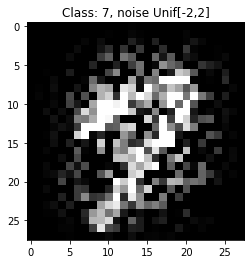

In [ ]:
 
noise = np.multiply(std, np.random.uniform(low = -2, high = 2, size = std.shape) ).astype(int)
print(noise)
example = train_images[15] + noise


for i in range(example.shape[0]):
  for j in range(example.shape[1]):
    if example[i,j] < 0:
      example[i,j] = 0
    elif example[i,j] > 256:
      example[i,j] = 256
      
print(example)
plt.figure()
plt.imshow(example, cmap='gray')
plt.title(f"Class: {train_labels[15]}, noise Unif[-2,2]")

In [ ]:
std = train_images.std(axis = 0)

In [ ]:
def noise_7(std, corr, var, i, j):
  out = np.zeros((7,7))
  out += std[i:i+7, j:j+7] * corr *np.random.normal(loc = 0, scale = var)
  out += std[i:i+7, j:j+7] * (1-corr)*np.random.normal(loc = 0, scale = var, size = (7,7))
  return out

In [ ]:
def noise_7(std, corr, var, i, j):
  out = np.zeros((7,7))
  out += std[i:i+7, j:j+7] * corr *np.random.uniform(low = -var, high = var)
  out += std[i:i+7, j:j+7] * (1-corr)*np.random.uniform(low = -var, high = var, size = (7,7))
  return out

In [ ]:
def create_noise(std, n, corr, var):
  out = np.zeros((n,n))
  for i in range(n//7):
      for j in range(n//7):
          
          
          out[7*i:7*i+7, 7*j:7*j+7] += noise_7(std, corr, var, i, j)

  return out



#create_noise(28, 0.5, 1)

In [ ]:
def perturbed_correlated(std, x, n, corr, var):
  out = deepcopy(x)
  out.astype(int)
  for i in range(out.shape[0]):
    out[i] = out[i] + create_noise(std, n, corr, var).astype(int)
    for j in range(out.shape[1]):
      for k in range(out.shape[2]):
        if out[i,j,k] < 0:
          out[i,j,k] = 0
        elif out[i,j,k] > 256:
          out[i,j,k] = 256
        else:
          out[i,j,k] = int(out[i,j,k])
  return out


In [ ]:
pd = perturbed_correlated(std,test_images, 28, 0.9, 1)

Text(0.5, 1.0, 'Class: 5, noise Unif[-2,2]')

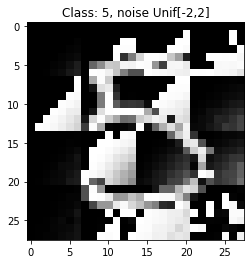

In [ ]:

example = pd[15]
      
#print(example)
plt.figure()
plt.imshow(example, cmap='gray')
plt.title(f"Class: {test_labels[15]}, noise Unif[-2,2]")

In [ ]:
pd2 = perturbed_correlated(std,test_images, 28, 0.5, 0.5)

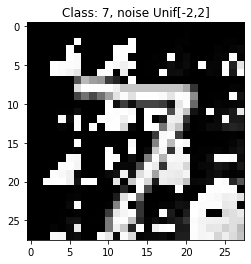

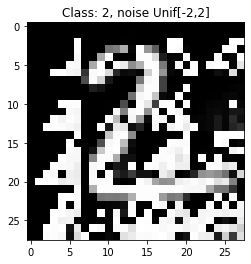

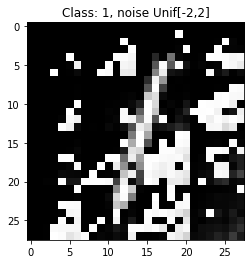

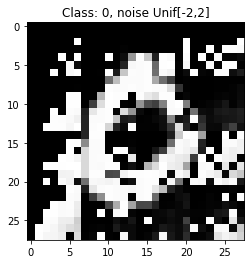

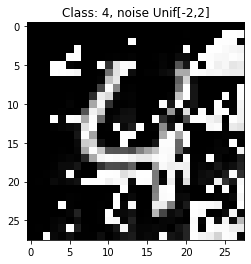

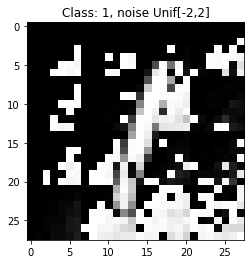

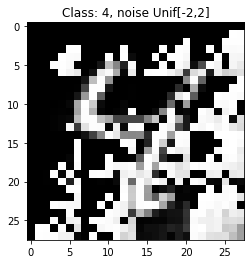

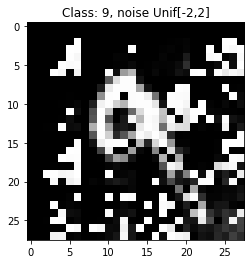

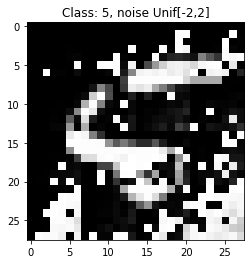

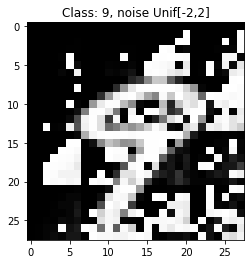

In [ ]:
example = pd2[15]
      
#print(example)
for i in range(10):
  example = pd2[i]
  plt.figure()
  plt.imshow(example, cmap='gray')
  plt.title(f"Class: {test_labels[i]}, noise Unif[-2,2]")

In [ ]:
pd3 = perturbed_correlated(std,test_images, 28, 0, 0.2)

In [ ]:
for i in range(16):
  example = pd3[i]
  plt.figure()
  plt.imshow(example, cmap='gray')
  plt.title(f"Class: {test_labels[i]}")

In [ ]:
pd4 = perturbed_correlated(std,train_images, 28, 0, 0.2)

In [ ]:
for i in range(16):
  example = pd4[i]
  plt.figure()
  plt.imshow(example, cmap='gray')
  plt.title(f"Class: {train_labels[i]}")

In [ ]:
pd.shape

(10000, 28, 28)

In [ ]:
cpd = normalize(pd.reshape(10000, 784, 1))

In [ ]:
cpd2 = normalize(pd2.reshape(10000, 784, 1))

In [ ]:
scores = model9.evaluate(cpd, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.9359 - accuracy: 0.3783


In [ ]:
model9.evaluate(cpd2, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.9891 - accuracy: 0.6900


[1.989107608795166, 0.6899999976158142]

In [ ]:
model6.evaluate(cpd, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 9.2153 - accuracy: 0.2949


[9.215315818786621, 0.29490000009536743]

In [ ]:
model8.evaluate(cpd, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 8.4793 - accuracy: 0.3442


[8.479337692260742, 0.3441999852657318]

In [ ]:
model9.evaluate(cpd, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 6.9359 - accuracy: 0.3783


[6.935872554779053, 0.3783000111579895]

In [ ]:
model3.evaluate(cpd, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.3760 - accuracy: 0.4190


[3.3759918212890625, 0.4189999997615814]

In [ ]:
model6.evaluate(cpd2, y_test)

313/313 [==============================] - 0s 2ms/step - loss: 3.4608 - accuracy: 0.5512


[3.460767984390259, 0.5511999726295471]

In [ ]:
model8.evaluate(cpd2, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 3.0106 - accuracy: 0.6224


[3.0105783939361572, 0.6223999857902527]

In [ ]:
model9.evaluate(cpd2, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.9891 - accuracy: 0.6900


[1.989107608795166, 0.6899999976158142]

In [ ]:
model3.evaluate(cpd2, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0661 - accuracy: 0.7166


[1.0660953521728516, 0.7166000008583069]